# The customized trained model for gesture

In [1]:
# Make sure you install all packages
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os

c:\Users\gq121\Desktop\INFO_550\INFO_550_Object_detection\ODenv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='../yolov5/runs/train/exp1/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to C:\Users\gq121/.cache\torch\hub\master.zip
YOLOv5  2022-4-8 torch 1.11.0+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


In [3]:
img = os.path.join('../pokemon_data', 'test','images')

In [4]:
files = os.listdir(img)

image 1/1: 640x640 1 Bulbasaur, 1 Squirtle
Speed: 40.0ms pre-process, 321.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


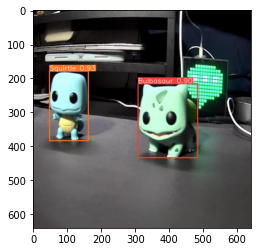

image 1/1: 640x640 1 Pikachu, 1 Squirtle
Speed: 39.0ms pre-process, 291.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


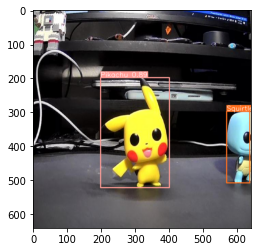

image 1/1: 640x640 1 Pikachu, 1 Squirtle
Speed: 37.0ms pre-process, 280.0ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)


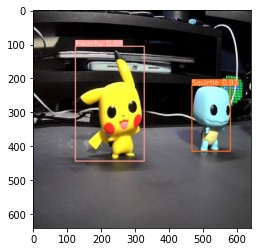

image 1/1: 640x640 1 Pikachu, 1 Squirtle
Speed: 35.0ms pre-process, 281.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


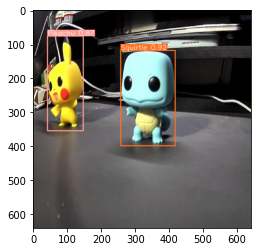

image 1/1: 640x640 1 Pikachu, 1 Squirtle
Speed: 34.0ms pre-process, 285.5ms inference, 1.0ms NMS per image at shape (1, 3, 640, 640)


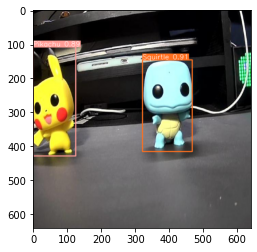

In [5]:
results = []
for file in files:
    result= model(os.path.join(img,file))
    result.print()
    %matplotlib inline 
    plt.imshow(np.squeeze(result.render()))
    plt.show()

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()